In [15]:
import numpy as np
from scipy.spatial.distance import cdist

In [16]:
x=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [22]:
def kmeans(x,k, no_of_iterations):
    idx =np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :]
    print(centroids)
    
    distances = cdist(x, centroids ,'euclidean') #Step 2
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    
    for i in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids) 
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    
    return points
 

kmeans(x,3,10)

[[ 7  8  9]
 [ 1  2  3]
 [10 11 12]]


array([1, 0, 0, 2], dtype=int64)

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

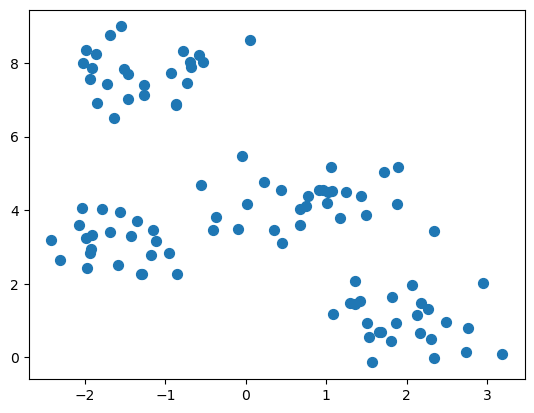

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

In [13]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print(y_kmeans)

C:\Users\Kuldeep Solanki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kuldeep Solanki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 2 4 4 4 1 0 2 1 2 2 2 2 2 2 5 3 1 0 5 4 2 0 5 1 0 1 4 3 5 5 2 5 3 0 4 2
 3 2 0 4 0 2 0 0 2 5 0 1 1 1 5 0 0 0 2 2 5 3 2 2 3 3 4 3 2 0 0 3 4 2 3 4 2
 4 4 1 0 5 3 5 2 0 1 5 0 3 5 4 4 4 0 1 0 0 2 2 0 2 1]


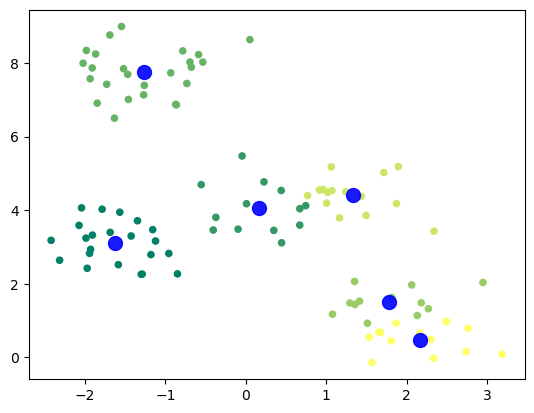

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()